In [ ]:
# studing finance and investing to learn python skills 
# blockchain is a technology that allows information to be permanently written to a decentralized database


In [1]:
! pip install Historic_Crypto



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip


In [1]:
from Historic_Crypto import HistoricalData
from Historic_Crypto import Cryptocurrencies 

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

In [18]:
assets = Cryptocurrencies().find_crypto_pairs()

Connected to the CoinBase Pro API.
Extended Output is False, returning reduced dataset.


In [3]:
eth = HistoricalData('ETH-EUR', 3600*24,'2022-08-22-00-00', '2023-08-22-00-00' ).retrieve_data()

Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'ETH-EUR' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2022-08-22T00:00:00
Provisional End: 2023-06-18T00:00:00
Data for chunk 1 of 2 extracted


C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\Historic_Crypto\HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2023-06-18T00:00:00
Provisional End: 2024-04-13T00:00:00
Data for chunk 2 of 2 extracted


In [4]:
eth

,low,high,open,close,volume
time,,,,,
2022-08-23,1576.99,1680.00,1634.46,1671.17,7554.192851
2022-08-24,1614.44,1699.83,1671.56,1661.26,7265.318392
2022-08-25,1660.12,1723.20,1661.23,1700.53,4501.020768
2022-08-26,1492.92,1700.00,1699.75,1514.48,14636.487207
2022-08-27,1453.64,1524.59,1514.71,1497.21,7718.449190
...,...,...,...,...,...
2023-08-18,1509.00,1564.32,1547.90,1529.52,6196.579344
2023-08-19,1522.91,1563.78,1529.87,1539.61,3012.149175
2023-08-20,1531.35,1559.81,1539.55,1550.46,3148.471793


<AxesSubplot:xlabel='time'>

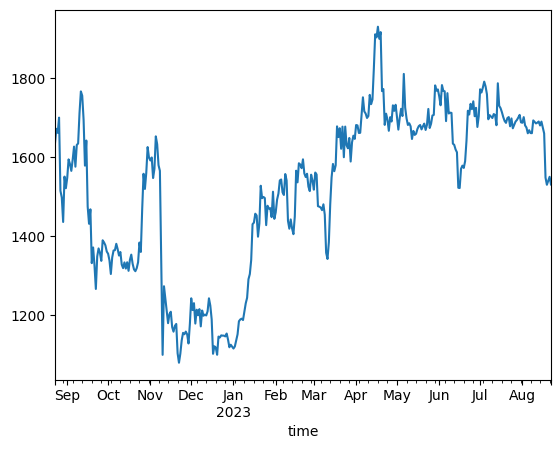

In [5]:
eth.open.plot()

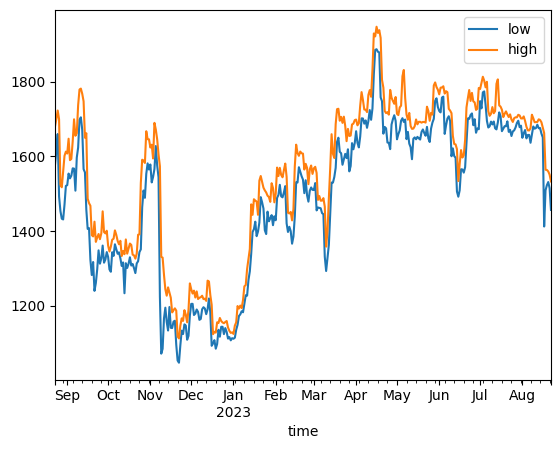

In [6]:
eth[['low', 'high']].plot.line();

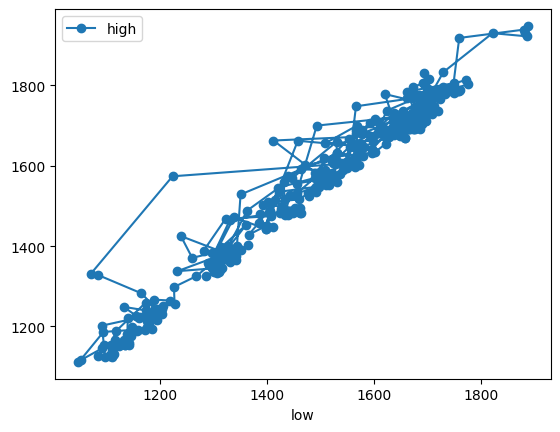

In [7]:
eth.plot.line(x ='low', y ='high', marker = 'o');

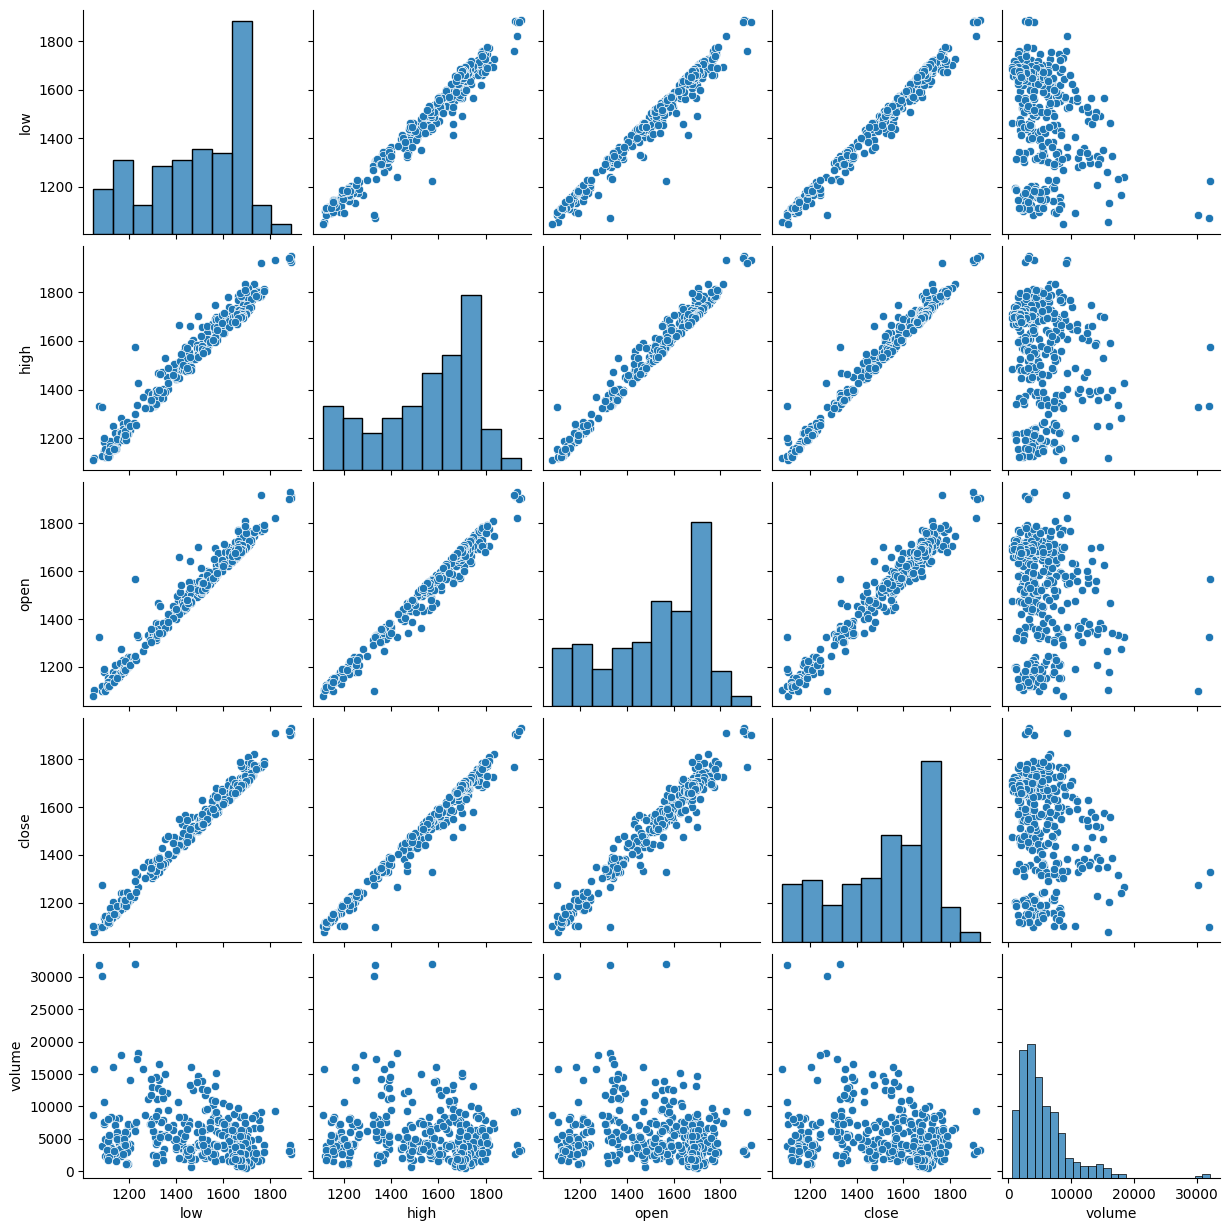

In [8]:
# they are supper strong correlation

sns.pairplot(eth)

In [13]:
eth['avg'] = eth[['low', 'high', 'open', 'close']].mean(axis = 1)

In [14]:
eth

,low,high,open,close,volume,avg
time,,,,,,
2022-08-23,1576.99,1680.00,1634.46,1671.17,7554.192851,1640.6550
2022-08-24,1614.44,1699.83,1671.56,1661.26,7265.318392,1661.7725
2022-08-25,1660.12,1723.20,1661.23,1700.53,4501.020768,1686.2700
2022-08-26,1492.92,1700.00,1699.75,1514.48,14636.487207,1601.7875
2022-08-27,1453.64,1524.59,1514.71,1497.21,7718.449190,1497.5375
...,...,...,...,...,...,...
2023-08-18,1509.00,1564.32,1547.90,1529.52,6196.579344,1537.6850
2023-08-19,1522.91,1563.78,1529.87,1539.61,3012.149175,1539.0425
2023-08-20,1531.35,1559.81,1539.55,1550.46,3148.471793,1545.2925


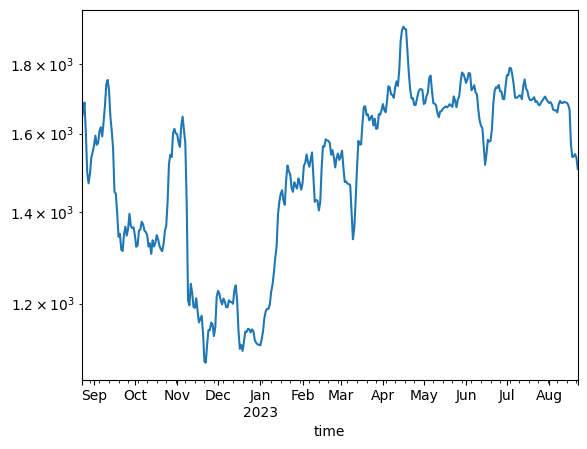

In [17]:
eth.avg.plot(logy = True);

In [19]:
# list all availlable assets
assets

,id,display_name,fx_stablecoin,max_slippage_percentage,status
0,SNX-GBP,SNX/GBP,False,0.03000000,online
1,AAVE-EUR,AAVE/EUR,False,0.03000000,online
2,IOTX-USD,IOTX/USD,False,0.03000000,online
3,GLM-USD,GLM/USD,False,0.03000000,online
4,COMP-USD,COMP/USD,False,0.03000000,online
...,...,...,...,...,...
593,BIT-USDT,BIT/USDT,False,0.03000000,online
594,PRQ-USD,PRQ/USD,False,0.03000000,online
595,BAT-ETH,BAT/ETH,False,0.03000000,online
596,ZEC-USD,ZEC/USD,False,0.03000000,online


In [21]:
eur_assets = assets[assets['display_name'].str.contains('EUR')]


In [22]:
eur_assets

,id,display_name,fx_stablecoin,max_slippage_percentage,status
1,AAVE-EUR,AAVE/EUR,False,0.03000000,online
17,EOS-EUR,EOS/EUR,False,0.03000000,online
19,BCH-EUR,BCH/EUR,False,0.03000000,online
21,DDX-EUR,DDX/EUR,False,0.03000000,delisted
22,FIL-EUR,FIL/EUR,False,0.03000000,online
...,...,...,...,...,...
572,FIDA-EUR,FIDA/EUR,False,0.03000000,online
578,WLUNA-EUR,WLUNA/EUR,False,0.10000000,delisted
580,MIR-EUR,MIR/EUR,False,0.03000000,delisted
582,MANA-EUR,MANA/EUR,False,0.03000000,online


In [25]:
currencies = ['BTC-EUR', 'ETH-EUR', 'XLM-EUR', 'ALGO-EUR', 'LINK-EUR']
df = pd.DataFrame()
for currency in currencies:
    a  = HistoricalData(currency, 3600*24,'2020-08-22-00-00', '2023-08-22-00-00' ).retrieve_data()
    a['avg'] = a[['low', 'high', 'open', 'close']].mean(axis = 1)
    df[currency] = a['avg']
    
    

Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'BTC-EUR' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2020-08-22T00:00:00
Provisional End: 2021-06-18T00:00:00
Data for chunk 1 of 4 extracted
Provisional Start: 2021-06-18T00:00:00
Provisional End: 2022-04-14T00:00:00
Data for chunk 2 of 4 extracted
Provisional Start: 2022-04-14T00:00:00
Provisional End: 2023-02-08T00:00:00


C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\Historic_Crypto\HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Data for chunk 3 of 4 extracted
Provisional Start: 2023-02-08T00:00:00
Provisional End: 2023-12-05T00:00:00
Data for chunk 4 of 4 extracted


C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\Historic_Crypto\HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'ETH-EUR' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2020-08-22T00:00:00
Provisional End: 2021-06-18T00:00:00
Data for chunk 1 of 4 extracted
Provisional Start: 2021-06-18T00:00:00
Provisional End: 2022-04-14T00:00:00
Data for chunk 2 of 4 extracted


C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\Historic_Crypto\HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2022-04-14T00:00:00
Provisional End: 2023-02-08T00:00:00
Data for chunk 3 of 4 extracted
Provisional Start: 2023-02-08T00:00:00
Provisional End: 2023-12-05T00:00:00
Data for chunk 4 of 4 extracted


C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\Historic_Crypto\HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'XLM-EUR' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2020-08-22T00:00:00
Provisional End: 2021-06-18T00:00:00
Data for chunk 1 of 4 extracted


C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\Historic_Crypto\HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2021-06-18T00:00:00
Provisional End: 2022-04-14T00:00:00
Data for chunk 2 of 4 extracted
Provisional Start: 2022-04-14T00:00:00
Provisional End: 2023-02-08T00:00:00
Data for chunk 3 of 4 extracted
Provisional Start: 2023-02-08T00:00:00
Provisional End: 2023-12-05T00:00:00
Data for chunk 4 of 4 extracted


C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\Historic_Crypto\HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'ALGO-EUR' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2020-08-22T00:00:00
Provisional End: 2021-06-18T00:00:00
Data for chunk 1 of 4 extracted


C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\Historic_Crypto\HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2021-06-18T00:00:00
Provisional End: 2022-04-14T00:00:00
Data for chunk 2 of 4 extracted
Provisional Start: 2022-04-14T00:00:00
Provisional End: 2023-02-08T00:00:00
Data for chunk 3 of 4 extracted
Provisional Start: 2023-02-08T00:00:00
Provisional End: 2023-12-05T00:00:00
Data for chunk 4 of 4 extracted


C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\Historic_Crypto\HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'LINK-EUR' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2020-08-22T00:00:00
Provisional End: 2021-06-18T00:00:00
Data for chunk 1 of 4 extracted


C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\Historic_Crypto\HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2021-06-18T00:00:00
Provisional End: 2022-04-14T00:00:00
Data for chunk 2 of 4 extracted
Provisional Start: 2022-04-14T00:00:00
Provisional End: 2023-02-08T00:00:00
Data for chunk 3 of 4 extracted
Provisional Start: 2023-02-08T00:00:00
Provisional End: 2023-12-05T00:00:00
Data for chunk 4 of 4 extracted


C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\Historic_Crypto\HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


In [26]:
df

,BTC-EUR,ETH-EUR,XLM-EUR,ALGO-EUR,LINK-EUR
time,,,,,
2020-08-23,9887.6150,332.8500,0.086385,0.502225,13.080343
2020-08-24,9933.1800,339.0275,0.087623,0.532025,12.915775
2020-08-25,9750.3875,333.0750,0.084586,0.500550,12.316135
2020-08-26,9642.3225,325.9750,0.082963,0.472100,12.508355
2020-08-27,9624.0375,325.3400,0.080773,0.450050,12.542385
...,...,...,...,...,...
2023-08-18,24188.0925,1537.6850,0.105548,0.088125,5.685000
2023-08-19,24005.6200,1539.0425,0.111435,0.088600,5.697500
2023-08-20,24077.6100,1545.2925,0.117265,0.089325,5.697500


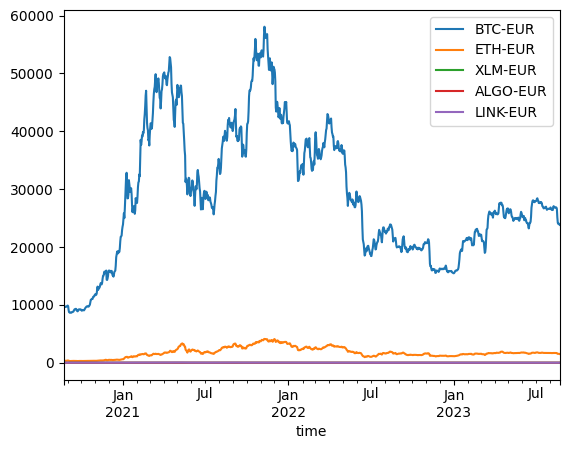

In [27]:
df.plot();

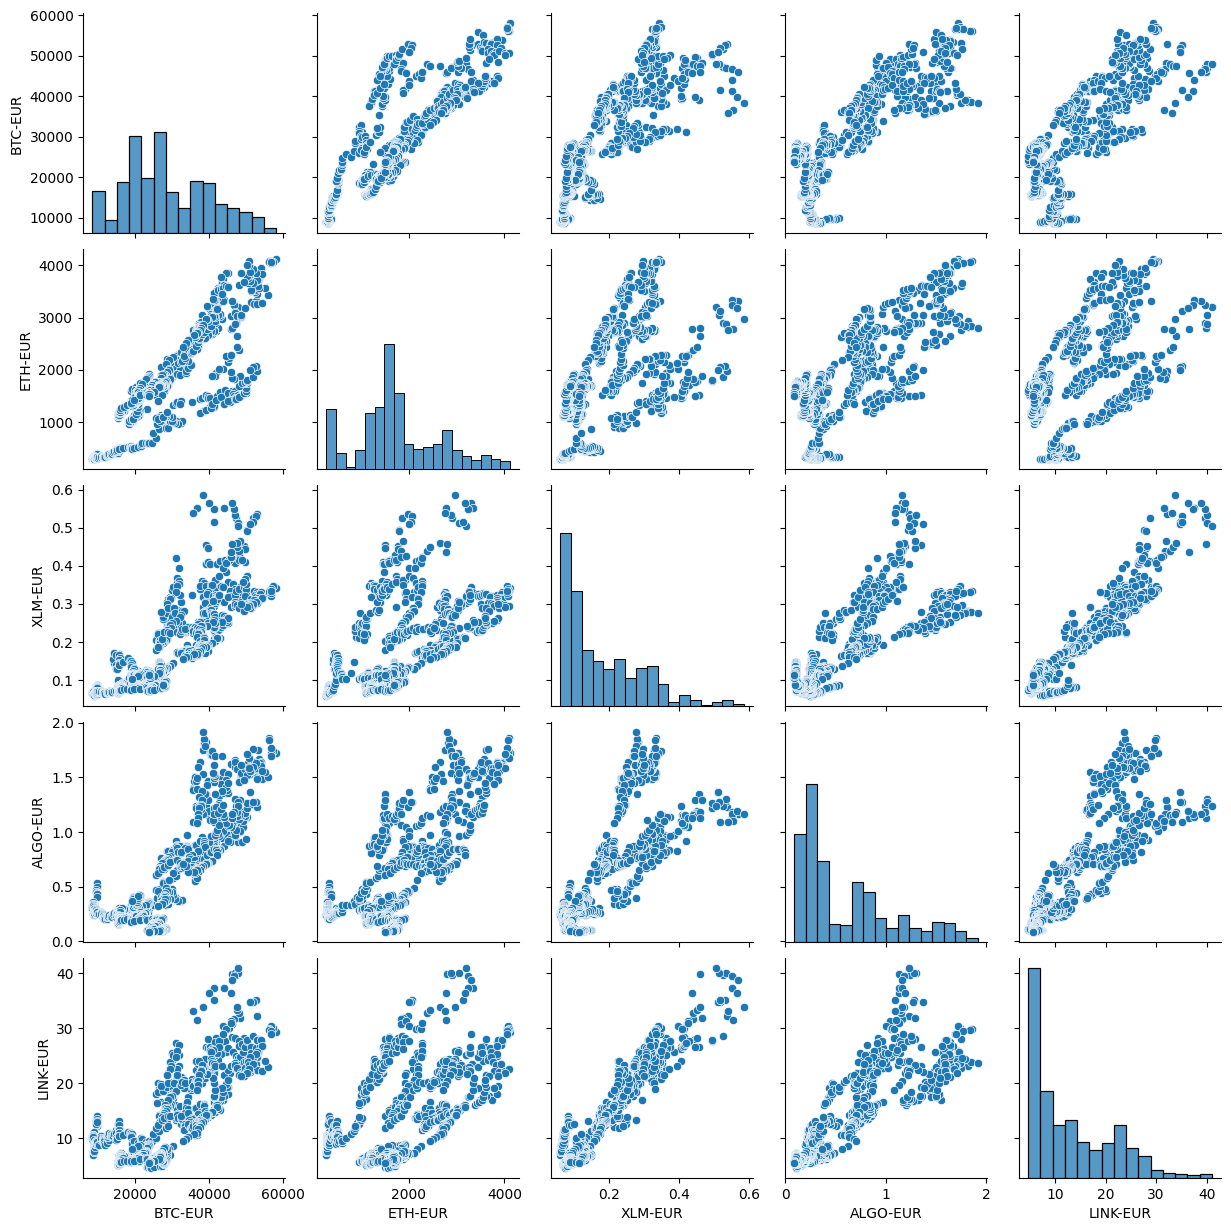

In [29]:
sns.pairplot(df);

In [30]:
df.columns

Index(['BTC-EUR', 'ETH-EUR', 'XLM-EUR', 'ALGO-EUR', 'LINK-EUR'], dtype='object')

In [39]:
for currency in currencies:
    xmin = df[currency].min()
    xmax = df[currency].max()
    df[currency] = df[currency].apply(lambda x: (x - xmin)/(xmax-xmin))

In [40]:
df

,BTC-EUR,ETH-EUR,XLM-EUR,ALGO-EUR,LINK-EUR
time,,,,,
2020-08-23,0.025533,0.012908,0.052052,0.226010,0.231043
2020-08-24,0.026454,0.014519,0.054402,0.242272,0.226517
2020-08-25,0.022757,0.012967,0.048635,0.225096,0.210024
2020-08-26,0.020571,0.011115,0.045552,0.209571,0.215311
2020-08-27,0.020201,0.010949,0.041393,0.197539,0.216247
...,...,...,...,...,...
2023-08-18,0.314774,0.327150,0.088453,0.000041,0.027642
2023-08-19,0.311083,0.327504,0.099634,0.000300,0.027985
2023-08-20,0.312540,0.329134,0.110710,0.000696,0.027985


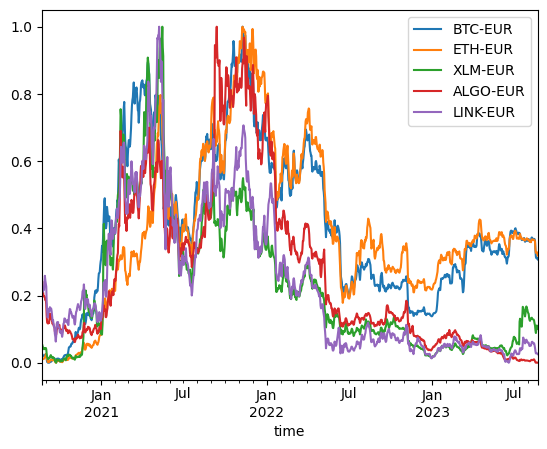

In [41]:
df.plot();